In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set(style="whitegrid", palette="pastel")

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from math import pi
import glob

In [2]:
fsm_names = [
    'Max Time', 'Obstacles', 'Environment', 
    'Wheel Base', 'Track Width', 'Wheel Radius', 'Weg Count', 
    'Ext. Slope', 'Ext. Intercept', 
    'F. Speed', 'F. Left Thresh', 'F. Right Thresh', 
    'L. Speed Left', 'L. Speed Right', 'L. Forward Thresh', 
    'R. Speed Left', 'R. Speed Right', 'R. Forward Thresh',
    'Waypoints', 'Distance', 'Time Remaining'
]

bnn_names = [
    'Max Time', 'Obstacles', 'Environment', 
    'Wheel Base', 'Track Width', 'Wheel Radius', 'Weg Count', 
    'Act', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11',
    'Waypoints', 'Distance', 'Time Remaining'
]

def load_eval_data(fname, names, num_trials=3, dmax=1):

    df = pd.read_csv(fname
                     , header=None
                     , names=names
                     , comment='#')
    
    # Add column denoting individuals
    df['Individual'] = pd.Series(np.repeat(np.arange(len(df.index)//num_trials), num_trials))

    # Add fitness
    df['Fitness'] = 2*df['Waypoints'] + (1 - np.minimum(df['Distance'], dmax)/dmax) + (90 - df['Time Remaining'])/90
    return df

fsm_file = '../src/fsm_eval_40-2_90-80-3-5.csv'
df_fsm = load_eval_data(fsm_file, fsm_names).assign(experiment='FSM-40-2')

bnn_file = '../src/bnn_eval_40-2_90-80-3-5.csv'
df_bnn = load_eval_data(bnn_file, bnn_names).assign(experiment='ANN-40-2')

# tws_file = '../src/tws_eval_40-2_90-80-3-5.csv'
# df_tws = load_eval_data(tws_file, bnn_names).assign(experiment='ANN Twist')

/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in minimum


In [3]:
# df = pd.concat([df_fsm, df_bnn, df_tws], ignore_index=True, sort=False)
df = pd.concat([df_fsm, df_bnn], ignore_index=True, sort=False)
# df.isnull().sum()

/Users/ajc/miniconda3/envs/analyze/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


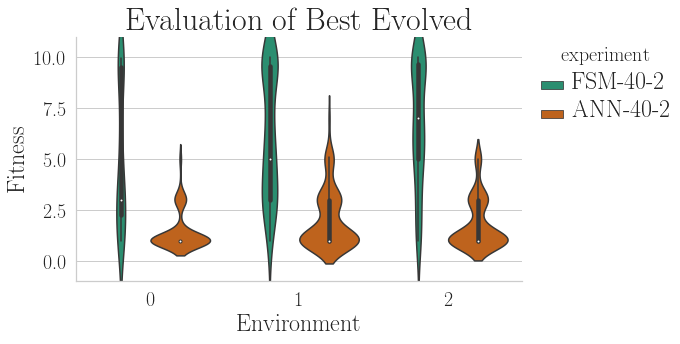

In [7]:
ticksize = 20
labelsize = 24
legendsize = labelsize
titlesize = 32

fsize = 16/2, 9/2
fig, ax = plt.subplots(1, 1, figsize=fsize)#, gridspec_kw={'width_ratios':[1, 3]})


colors = sns.color_palette(['#1b9e77','#d95f02','#7570b3'])

ax = sns.violinplot(ax=ax
                    , data=df
                    , x='Environment'
                    , y='Fitness'
                    , hue='experiment'
                    , palette=colors)

# Set the y limits with some padding
ymin, ymax = 0, 10
y_padding = (ymax - ymin) * 0.1
ylims_with_padding = [ymin - y_padding, ymax + y_padding]
ax.set_ylim(ylims_with_padding);

# Prettify the lines and ticks
yticks = np.linspace(ymin, ymax, num=5)
ax.set_yticklabels([round(yval, 1) for yval in yticks], fontsize=ticksize);
ax.set_yticks(yticks);

ax.yaxis.label.set_fontsize(labelsize);
ax.xaxis.label.set_fontsize(labelsize);

ax.set_xticklabels(ax.get_xticklabels(), fontsize=ticksize);

lgnd = ax.get_legend()

lgnd.set_bbox_to_anchor((1.35, 1))
lgnd.set_frame_on(False)
plt.setp(lgnd.get_texts(), fontsize=legendsize)
plt.setp(lgnd.get_title(), fontsize=ticksize)

ax.set_title('Evaluation of Best Evolved', fontsize=titlesize)

sns.despine()

In [8]:
fig.savefig('evaluation.png', bbox_inches='tight') #, bbox_extra_artists=(lgd, ttl)

In [55]:
df[df['experiment'] == 'ANN Twist'].nlargest(50, 'Fitness').to_csv('tws_best_evaluated.csv', index_label='Index')